# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [389]:
path = r"D:\Escuela\SextoSemestre\SemanaTec\TC1002S\NotebooksStudents\A01639678\iris\iris.csv"

In [390]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [391]:
# Load the dataset
df = pd.read_csv(path,header=0)
#First we have to add name to the columns, this information was contained in the iris.names file
df.columns = ["slength","swidth","plength","pwidth","class"]

# Understanding and preprocessing the data

1. Get a general 'feel' of the data


In [392]:
# Print the dataframe
print(df)

     slength  swidth  plength  pwidth           class
0        4.9     3.0      1.4     0.2     Iris-setosa
1        4.7     3.2      1.3     0.2     Iris-setosa
2        4.6     3.1      1.5     0.2     Iris-setosa
3        5.0     3.6      1.4     0.2     Iris-setosa
4        5.4     3.9      1.7     0.4     Iris-setosa
..       ...     ...      ...     ...             ...
144      6.7     3.0      5.2     2.3  Iris-virginica
145      6.3     2.5      5.0     1.9  Iris-virginica
146      6.5     3.0      5.2     2.0  Iris-virginica
147      6.2     3.4      5.4     2.3  Iris-virginica
148      5.9     3.0      5.1     1.8  Iris-virginica

[149 rows x 5 columns]


In [393]:
# get the number of observations and variables
# Observations
rows_count = df.shape[0]
print('Number of Rows count is:', rows_count )
# Variables
columns_count = df.shape[1]
print('Number of Columns count is:', columns_count )

Number of Rows count is: 149
Number of Columns count is: 5


2. Drop rows with any missing values


In [394]:
# Drop rows with NaN values if existing
df.dropna()
# Print the new shape
print(df)

     slength  swidth  plength  pwidth           class
0        4.9     3.0      1.4     0.2     Iris-setosa
1        4.7     3.2      1.3     0.2     Iris-setosa
2        4.6     3.1      1.5     0.2     Iris-setosa
3        5.0     3.6      1.4     0.2     Iris-setosa
4        5.4     3.9      1.7     0.4     Iris-setosa
..       ...     ...      ...     ...             ...
144      6.7     3.0      5.2     2.3  Iris-virginica
145      6.3     2.5      5.0     1.9  Iris-virginica
146      6.5     3.0      5.2     2.0  Iris-virginica
147      6.2     3.4      5.4     2.3  Iris-virginica
148      5.9     3.0      5.1     1.8  Iris-virginica

[149 rows x 5 columns]


3. Scatterplot




<Axes: xlabel='swidth', ylabel='slength'>

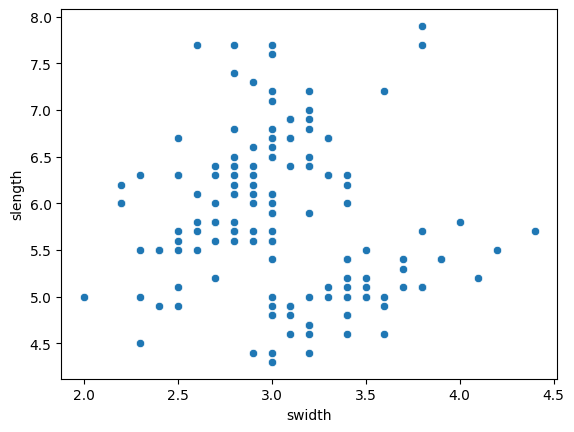

In [395]:
# Scatterplot of setals
sns.scatterplot(data=df,y="slength", x="swidth")

<Axes: xlabel='pwidth', ylabel='plength'>

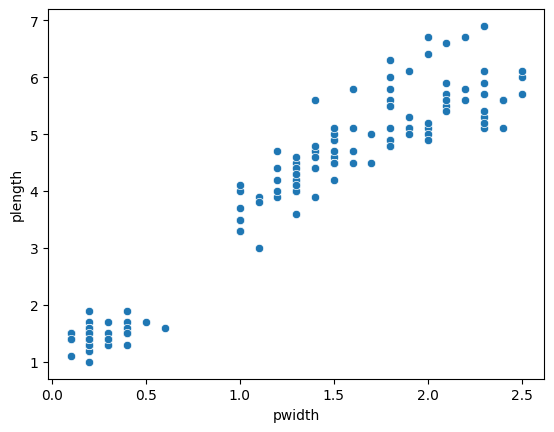

In [396]:
# Scatterplot of petals
sns.scatterplot(data=df,y="plength", x="pwidth")

Difficult to plot independetly all combinations, let's use pairplot

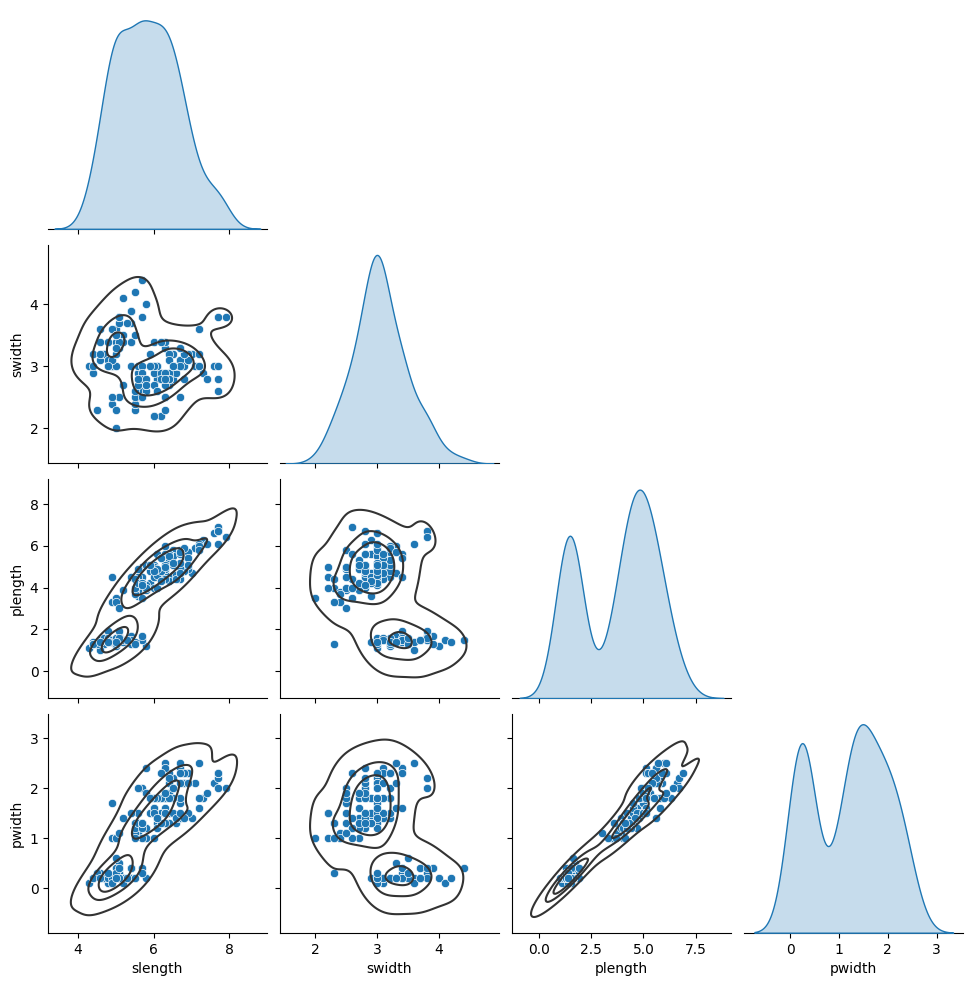

In [397]:
# Pairplot: Scatterplot of all variables
#sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, corner = True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4,color=".2")
plt.show()

It looks like there are 2 or 3 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

<Axes: >

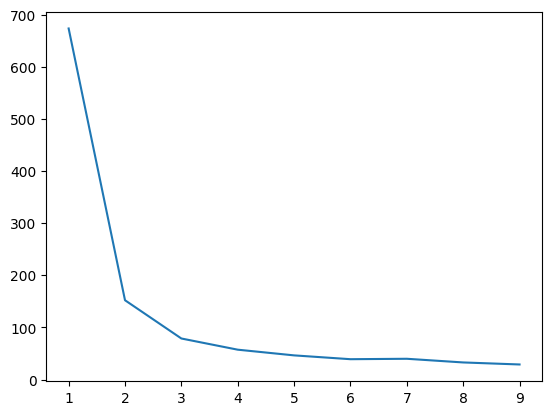

In [398]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k

k_values = range(1, 10)

# Remove the species column
iris_analysis = df.drop(axis=1, columns=['class'])

# For each k
for k in k_values:
    # Create a kmeans model with k clusters
    km = KMeans(n_clusters=k, n_init='auto')
    # Fit the model to the data
    km.fit(iris_analysis)
    # Append the SSE to the list
    sse.append(km.inertia_)

sns.lineplot(x=k_values, y=sse)

In [399]:
# Add a new column to the dataset with the cluster information
df["yestimated"] = yestimated

df.head()

,slength,swidth,plength,pwidth,class,yestimated
0,4.9,3.0,1.4,0.2,Iris-setosa,1
1,4.7,3.2,1.3,0.2,Iris-setosa,1
2,4.6,3.1,1.5,0.2,Iris-setosa,1
3,5.0,3.6,1.4,0.2,Iris-setosa,1
4,5.4,3.9,1.7,0.4,Iris-setosa,1


In [400]:
# Label of the estimated clusters
df.yestimated.unique()

array([1, 2, 0])

In [401]:
#Borrando la columna yestimated para que no contamine los datos
df.drop('yestimated', axis=1, inplace=True)
print(df)

     slength  swidth  plength  pwidth           class
0        4.9     3.0      1.4     0.2     Iris-setosa
1        4.7     3.2      1.3     0.2     Iris-setosa
2        4.6     3.1      1.5     0.2     Iris-setosa
3        5.0     3.6      1.4     0.2     Iris-setosa
4        5.4     3.9      1.7     0.4     Iris-setosa
..       ...     ...      ...     ...             ...
144      6.7     3.0      5.2     2.3  Iris-virginica
145      6.3     2.5      5.0     1.9  Iris-virginica
146      6.5     3.0      5.2     2.0  Iris-virginica
147      6.2     3.4      5.4     2.3  Iris-virginica
148      5.9     3.0      5.1     1.8  Iris-virginica

[149 rows x 5 columns]


In [402]:
# Cluster centroides
centroids = km.cluster_centers_
centroids

array([[6.38      , 3.32      , 5.6       , 2.4       ],
       [5.24814815, 3.67407407, 1.5037037 , 0.28518519],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [6.01666667, 2.70555556, 4.98333333, 1.77222222],
       [6.44210526, 2.97894737, 4.59473684, 1.43157895],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [6.665     , 3.        , 5.54      , 2.06      ],
       [5.        , 2.3       , 3.275     , 1.025     ]])

In [403]:
# Sum of squared error (sse) of the final model
km.inertia_

28.959697146907676

In [404]:
# The number of iterations required to converge
km.n_iter_

8

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

In [405]:
km = KMeans(n_clusters=3, n_init='auto')
iris_analysis = df.drop(axis=1, columns=['class'])

df["yestimated"] = km.fit_predict(iris_analysis)

print(df.tail())

ranges = [(df.slength.min(), df.slength.max()),
(df.swidth.min(), df.swidth.max()),
(df.plength.min(), df.plength.max()),
(df.pwidth.min(), df.pwidth.max())]

print(ranges)

     slength  swidth  plength  pwidth           class  yestimated
144      6.7     3.0      5.2     2.3  Iris-virginica           0
145      6.3     2.5      5.0     1.9  Iris-virginica           2
146      6.5     3.0      5.2     2.0  Iris-virginica           0
147      6.2     3.4      5.4     2.3  Iris-virginica           0
148      5.9     3.0      5.1     1.8  Iris-virginica           2
[(4.3, 7.9), (2.0, 4.4), (1.0, 6.9), (0.1, 2.5)]


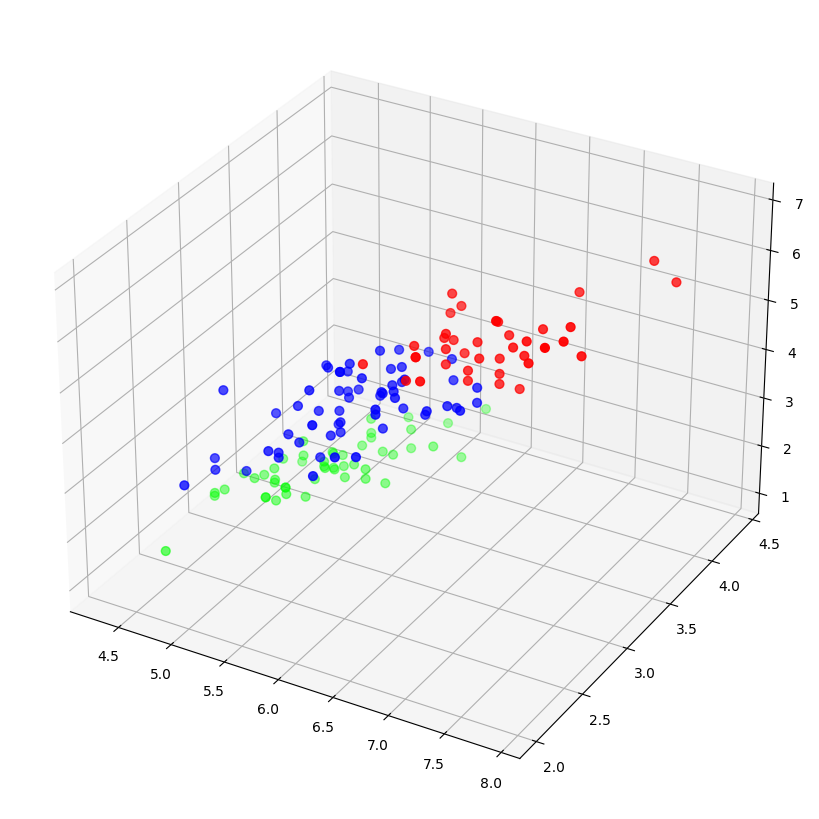

In [410]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Red, Green, Blue
color_map = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

sc = ax.scatter(df['slength'], df['swidth'], df['plength'], c=df["yestimated"], s=40, cmap=color_map)

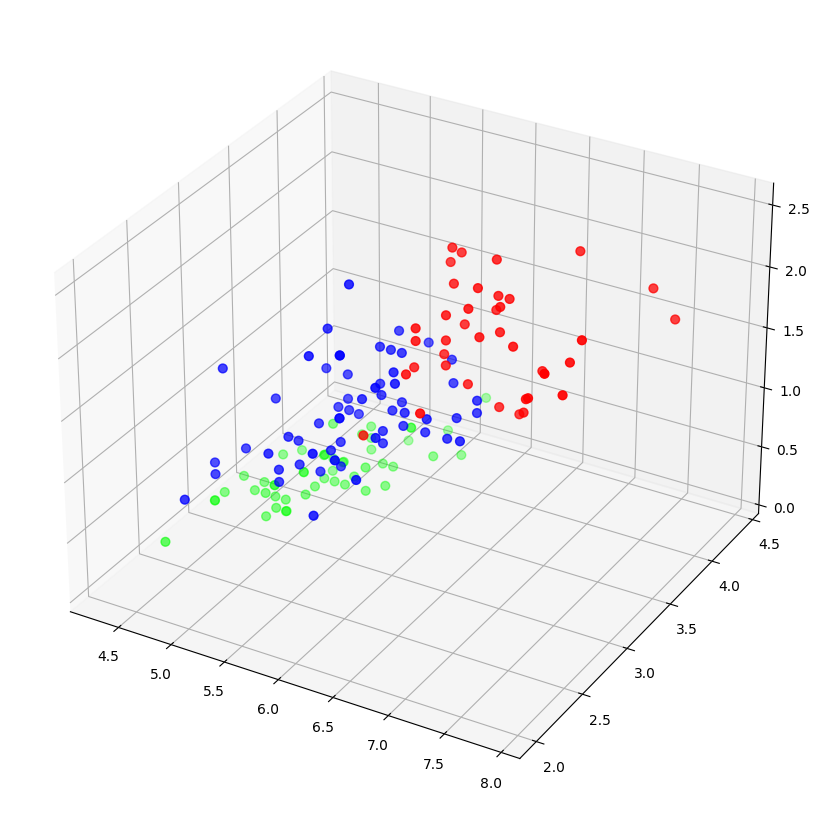

In [411]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(df['slength'], df['swidth'], df['pwidth'], c=df["yestimated"], s=40, cmap=color_map)

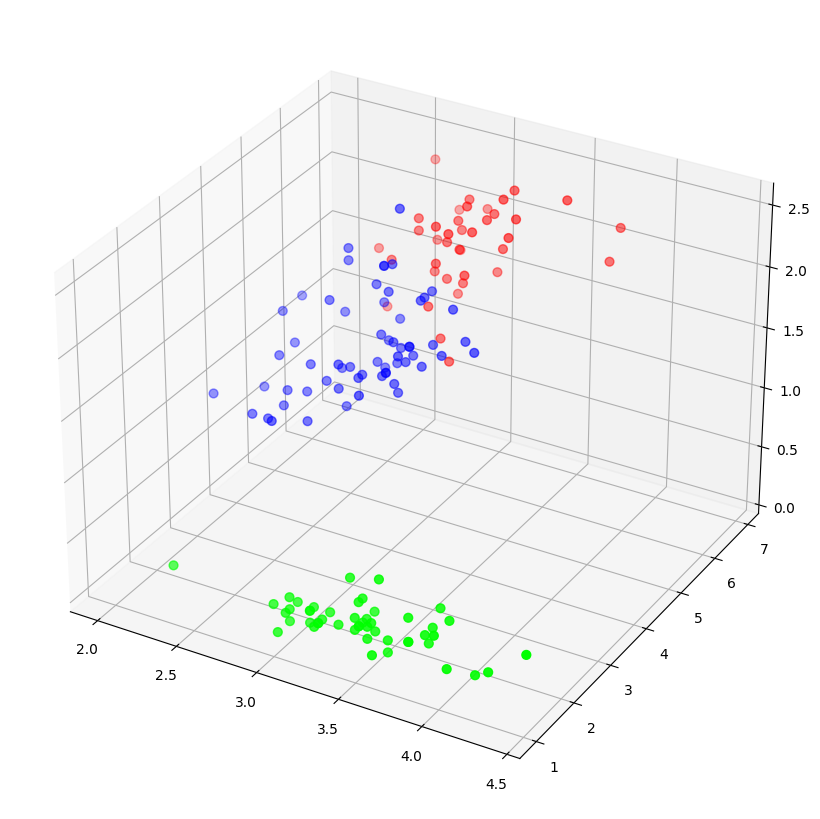

In [412]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(df['swidth'], df['plength'], df['pwidth'], c=df["yestimated"], s=40, cmap=color_map)

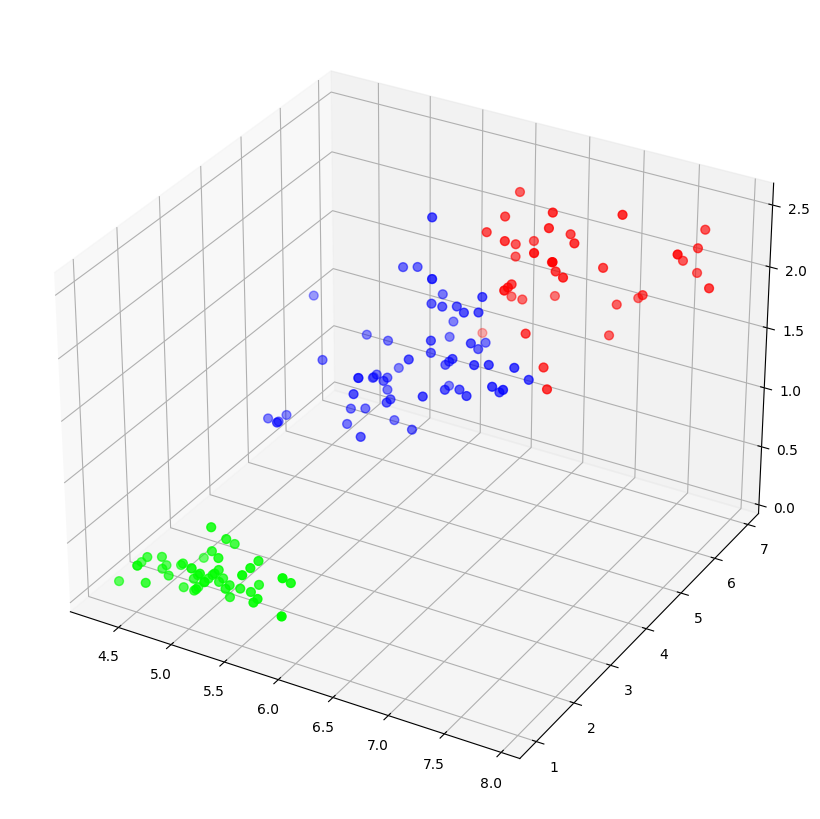

In [413]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(df['slength'], df['plength'], df['pwidth'], c=df["yestimated"], s=40, cmap=color_map)

In [414]:
# Drop sepal length and width

petals = df.drop(axis=1, columns=['slength', 'swidth', 'class', 'yestimated'])

petals.head()

,plength,pwidth
0,1.4,0.2
1,1.3,0.2
2,1.5,0.2
3,1.4,0.2
4,1.7,0.4


<Axes: xlabel='plength', ylabel='pwidth'>

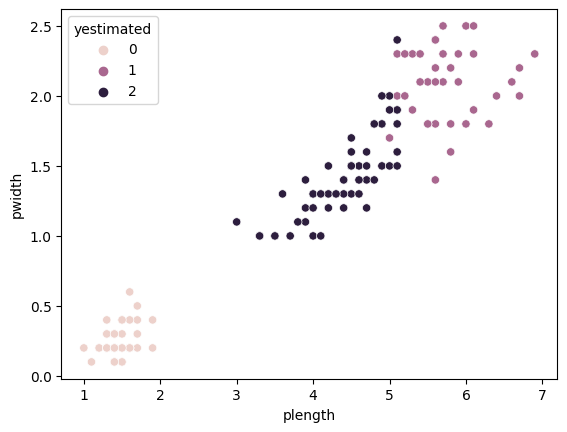

In [415]:
km = KMeans(n_clusters=3, n_init='auto')

petals["yestimated"] = km.fit_predict(iris_analysis)

sns.scatterplot(x="plength", y="pwidth", data=petals, hue="yestimated")

In [417]:
# Drop petal length and width

sepals = df.drop(axis=1, columns=['plength', 'pwidth', 'class', 'yestimated'])

sepals.head()

,slength,swidth
0,4.9,3.0
1,4.7,3.2
2,4.6,3.1
3,5.0,3.6
4,5.4,3.9


<Axes: xlabel='slength', ylabel='swidth'>

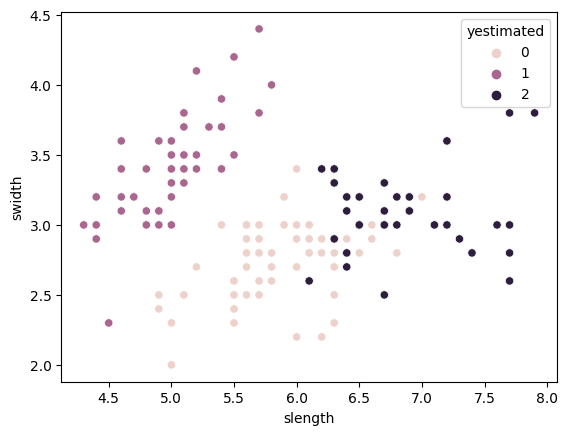

In [418]:
km = KMeans(n_clusters=3, n_init='auto')

sepals["yestimated"] = km.fit_predict(iris_analysis)

sns.scatterplot(x="slength", y="swidth", data=sepals, hue="yestimated")

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics
